In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import xb.plotting as xp
import json
import os

In [5]:
path_unsegmented_datasets='../../../figures/2.comparison_between_datasets/input_for_segmentation/'
datasets=os.listdir(path_unsegmented_datasets)
datasets

['.ipynb_checkpoints',
 'CosMx',
 'CosMxsegmented_mask.tif',
 'HybrISS',
 'HybrISSsegmented_mask.tif',
 'MERFISH_ABI',
 'ResolvedBiosciences',
 'Vizgen',
 'Xenium',
 'Xeniumsegmented_mask.tif']

In [8]:
ds='HybrISS'

In [9]:
adata=sc.read(path_unsegmented_datasets+ds+'/adata.h5ad')

# We reed the SVG with coords

In [11]:
path_to_pols='../../../figures/2.comparison_between_datasets/polygons_original/'
tag='SpatialPolygon_Hybriss.csv'
csv_file=path_to_pols+tag

In [12]:
output=pd.read_csv(path_to_pols+csv_file,index_col=0)

In [13]:
output.columns=['x', 'y','ID', 'region_annotation']

In [14]:
from shapely.geometry import Point, Polygon
def domainassign(plsin,adatadom):
    adatadom.obs['region_annotation']='None'
    plt.figure()
    for sel in plsin['region_annotation'].unique():
        plsub=plsin[plsin['region_annotation']==sel]
        if plsub.shape[0]>2:
    #        plt.figure()
            coord = np.array(plsub[['y','x']]).tolist()
            coord.append(coord[0])
            poli=Polygon(coord)
            xs, ys = zip(*coord) #create lists of x and y values
            plt.plot(xs,ys,color='black') 
            plt.title(sel)
            for n in adatadom.obs.index:
                pnt=Point(adatadom.obs.loc[n,'y_centroid'],adatadom.obs.loc[n,'x_centroid'])
                if pnt.within(poli)==True:
                    adatadom.obs.loc[n,'region_annotation']=sel
    plt.scatter(adatadom.obs['y_centroid'],adatadom.obs['x_centroid'],s=0.5)
    plt.show() # if you need...
    return adatadom

In [15]:
def domainassign_plot(plsin,adatadom):
    adatadom.obs['region_annotation']='None'
    plt.figure()
    for sel in plsin['region_annotation'].unique():
        plsub=plsin[plsin['region_annotation']==sel]
        if plsub.shape[0]>2:
    #        plt.figure()
            coord = np.array(plsub[['y','x']]).tolist()
            coord.append(coord[0])
            poli=Polygon(coord)
            xs, ys = zip(*coord) #create lists of x and y values
            plt.plot(xs,ys,color='black') 
            plt.title(sel)
    plt.scatter(adatadom.obs['y_centroid'],adatadom.obs['x_centroid'],s=0.5)
    plt.show() # if you need...
    return adatadom

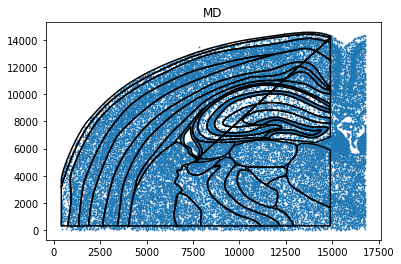

In [17]:
pls=output
adata_anno=domainassign(pls,adata)

In [18]:
adata_anno.write('../../../figures/2.comparison_between_datasets/with_regional_anno_segmented/anno_Hybriss.h5ad')